About Dataset:
    
This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df = df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 11)

In [7]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

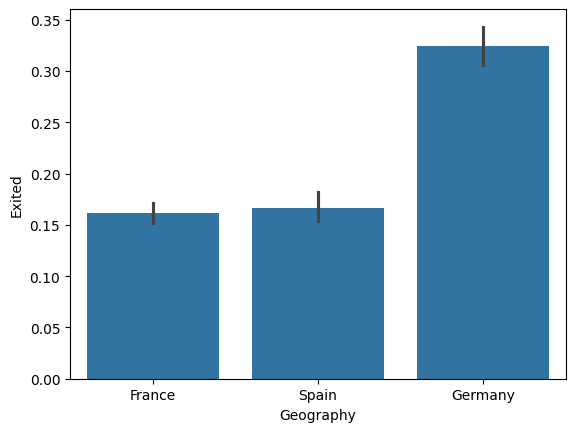

In [9]:
sns.barplot(df,x='Geography',y='Exited')
plt.show()

In [10]:
#Data Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
df['Gender'] = le.fit_transform(df['Gender'])

In [12]:
df = pd.get_dummies(df,columns=['Geography'],dtype='int')

In [13]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


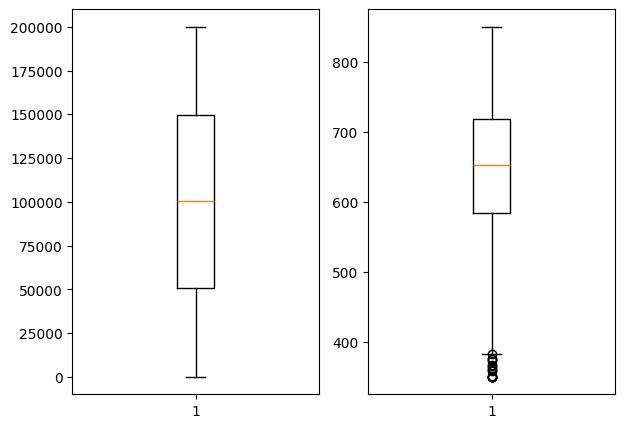

In [14]:
plt.figure(figsize=(7,5))
plt.subplot(1,2,1)
plt.boxplot(df['EstimatedSalary'])
plt.subplot(1,2,2)
plt.boxplot(df['CreditScore'])
plt.show()

In [15]:
mean = df['CreditScore'].mean()
std = df['CreditScore'].std()

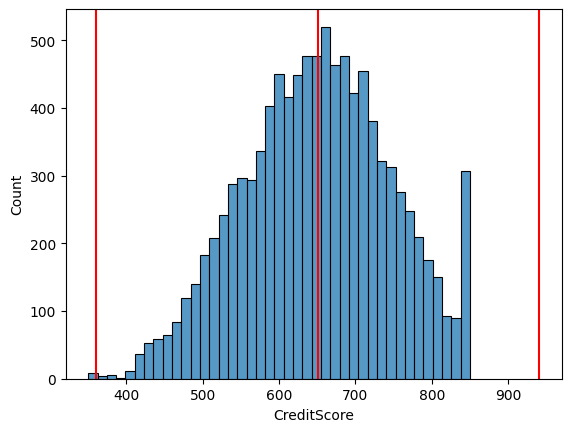

In [16]:
sns.histplot(df,x='CreditScore')
plt.axvline(mean,color='red')
plt.axvline(mean-3*std,color='red')
plt.axvline(mean+3*std,color='red')
plt.show()

In [17]:
data=df[df['CreditScore']<mean-3*std].index

In [18]:
df=df.drop(data)

In [19]:
df.shape

(9992, 13)

In [20]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [21]:
df.corr()['Exited']

CreditScore         -0.022328
Gender              -0.106181
Age                  0.284326
Tenure              -0.013476
Balance              0.118145
NumOfProducts       -0.047500
HasCrCard           -0.007306
IsActiveMember      -0.155992
EstimatedSalary      0.010792
Exited               1.000000
Geography_France    -0.105157
Geography_Germany    0.173833
Geography_Spain     -0.052779
Name: Exited, dtype: float64

In [22]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [23]:
y.value_counts()

Exited
0    7963
1    2029
Name: count, dtype: int64

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [85]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [86]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [87]:
pred_test = lr.predict(X_test)

In [88]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_validate

In [89]:
r2_score(y_test,pred_test)

0.1718972397834746

##OverSampling using SMOTE

In [32]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_sm,y_sm = sm.fit_resample(X,y)

In [33]:
y_sm.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.2,random_state=20)

In [77]:
lr = LinearRegression()

In [78]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [79]:
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [80]:
pred = lr.predict(x_test)

In [81]:
r2_score(y_test,pred)

0.4776721342036152